In [1]:
import json
import random
import requests
import os
from time import sleep

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
from websocket import create_connection
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
sns.set_style('whitegrid')
sns.set_context('notebook')

## Import and clean queried data

In [5]:
from data_cleaning_utils import import_trade_data, get_individual_trades

In [6]:
trade_data = import_trade_data()

In [7]:
trade_data

,id,account,isLong,key,status,increaseList,decreaseList,updateList,sizeDelta,collateralDelta,...,collateral,averagePrice,realisedPnl,realisedPnlPercentage,closedPosition,collateralTokenName,indexTokenName,tradeOpenDate,tradeClosedDate,positionLiquidated
0,Trade:0x0782ec391ed8519d8f9bba3343ac029e03e020...,0xa7e38489a00e6dd16ff479638b5265cb505a9052,True,0xab78b82ca08500e0e9db1d27783b0647e4f68b259500...,closed,[{'id': 'IncreasePosition:0x229eb6ef8cce3805d3...,[{'id': 'DecreasePosition:0x0782ec391ed8519d8f...,[{'id': 'UpdatePosition:0x229eb6ef8cce3805d3d8...,12167073.170732,498849.998311,...,446682.925279,3145.76,275945.562343,6177,{'id': 'ClosePosition:0x0782ec391ed8519d8f9bba...,WETH,WETH,2022-02-10 14:52:43,2022-02-10 15:53:34,False
1,Trade:0x083f5c361d0fb38660405d3eee023d84473e2b...,0xa7e38489a00e6dd16ff479638b5265cb505a9052,False,0xb64c27aa76f6079de044b27763f5d417bc82b0e0dbba...,closed,[{'id': 'IncreasePosition:0x20175a1829b925fd53...,[{'id': 'DecreasePosition:0x083f5c361d0fb38660...,[{'id': 'UpdatePosition:0x20175a1829b925fd539a...,973027.177059,49590.441585,...,48617.414408,3316.31,-575.076898,-118,{'id': 'ClosePosition:0x083f5c361d0fb38660405d...,USDC,WETH,2022-03-28 06:05:23,2022-03-28 06:32:29,False
2,Trade:0x0b8de799ecd429d2e0930e20f4cb3a9e34cc05...,0xa7e38489a00e6dd16ff479638b5265cb505a9052,False,0xb64c27aa76f6079de044b27763f5d417bc82b0e0dbba...,closed,[{'id': 'IncreasePosition:0xa91e84cfe9bcd8850e...,[{'id': 'DecreasePosition:0x0b8de799ecd429d2e0...,[{'id': 'UpdatePosition:0xa91e84cfe9bcd8850ef7...,5113119.375,210000.0,...,204886.880625,2694.5,77802.150445,3797,{'id': 'ClosePosition:0x0b8de799ecd429d2e0930e...,USDC,WETH,2022-02-03 01:44:50,2022-02-03 04:22:16,False
3,Trade:0x0ccc38eec3b7f5075e5bd42851877a8bf3a01e...,0xa7e38489a00e6dd16ff479638b5265cb505a9052,False,0xb64c27aa76f6079de044b27763f5d417bc82b0e0dbba...,closed,[{'id': 'IncreasePosition:0x2f94b05ba9938929ad...,[{'id': 'DecreasePosition:0x0ccc38eec3b7f5075e...,[{'id': 'UpdatePosition:0x2f94b05ba9938929adf7...,12195121.95122,500000.0,...,487804.878049,2965.99,-61304.747586,-1256,{'id': 'ClosePosition:0x0ccc38eec3b7f5075e5bd4...,USDC,WETH,2022-02-12 19:27:50,2022-02-12 20:33:46,False
4,Trade:0x0dd5923617372b8b5502dd3c3a27bd052dd8a0...,0xa7e38489a00e6dd16ff479638b5265cb505a9052,False,0xb64c27aa76f6079de044b27763f5d417bc82b0e0dbba...,closed,[{'id': 'IncreasePosition:0xa417dcae5f744d6f9f...,[{'id': 'DecreasePosition:0x0dd5923617372b8b55...,[{'id': 'UpdatePosition:0xa417dcae5f744d6f9fe1...,3856629.761529,196688.117838,...,192831.488076,3040.7,23210.551727,1203,{'id': 'ClosePosition:0x0dd5923617372b8b5502dd...,USDC,WETH,2022-04-14 15:20:56,2022-04-14 15:45:46,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44186,Trade:0xfa5433b9bde564357d05614f5daceb27995ebb...,0xff33f5653e547a0b54b86b35a45e8b1c9abd1c46,False,0xeffe5c609bee5a5ad9e057c41752e3ccd7c53bcff6db...,closed,[{'id': 'IncreasePosition:0x5fa338b97c871f9a2b...,[{'id': 'DecreasePosition:0xfa5433b9bde564357d...,[{'id': 'UpdatePosition:0x5fa338b97c871f9a2b86...,12580133.555419,559767.177898,...,547187.044343,3166.19,321278.760684,5871,{'id': 'ClosePosition:0xfa5433b9bde564357d0561...,USDT,WETH,2022-01-19 00:32:30,2022-01-19 09:54:48,False
44187,Trade:0xfb9de19bfdbb786f701305b09cc6c58c035cdd...,0xff33f5653e547a0b54b86b35a45e8b1c9abd1c46,True,0xe0291afd8f75e142678b3d7c624d4fdff8a8f13d00a8...,closed,[{'id': 'IncreasePosition:0xccf9a3473e4fe8755a...,[{'id': 'DecreasePosition:0xfb9de19bfdbb786f70...,[{'id': 'UpdatePosition:0xccf9a3473e4fe8755af5...,341710.210616,23035.079799,...,22693.369588,46916.23,0.0,0,{'id': 'ClosePosition:0xfb9de19bfdbb786f701305...,WBTC,WBTC,2021-12-15 16:24:44,2021-12-15 16:33:35,False
44188,Trade:0xfbcace9024b22eba8d37c40aa0da5b68af8e97...,0xff33f5653e547a0b54b86b35a45e8b1c9abd1c46,False,0xeffe5c609bee5a5ad9e057c41752e3ccd7c53bcff6db...,closed,[{'id': 'IncreasePosition:0x6f9085ccecae1361b0...,[{'id': 'DecreasePosition:0xfbcace9024b22eba8d...,[{'id': 

In [8]:
positions = get_individual_trades(trade_data)

In [9]:
positions

,time,account,collateralToken,indexToken,isLong,position_type,sizeDelta,price,collateralDelta,fee,id,key,timestamp
0,2021-08-31 08:41:51,0x5f799f365fa8a2b60ac0429c48b153ca5a6f0cf8,WBTC,WBTC,True,IncreasePosition,19.959929,47923.0,9.883047,0.01996,IncreasePosition:0xb45c0cd26357bf450b8c4bc8980...,0x40860b8f5c0cff4e25886e99dae5f42145c54c04589d...,1.630399e+09
1,2021-08-31 08:42:50,0x5f799f365fa8a2b60ac0429c48b153ca5a6f0cf8,USDC,WETH,False,IncreasePosition,19.96008,3332.310782,10.0,0.01996,IncreasePosition:0x68e6f54f2969066db11e11a46a0...,0x8f3844a22bbdde0e43ee012eaf4a8ffba9603f415e65...,1.630399e+09
2,2021-08-31 09:20:29,0x5f799f365fa8a2b60ac0429c48b153ca5a6f0cf8,USDC,WBTC,False,IncreasePosition,19.959929,47637.977545,10.0,0.01996,IncreasePosition:0xef43cdd3144128da8d2ce83db4f...,0x811dcb18360bd4767d13eff9df4c5921e3894e56c324...,1.630402e+09
3,2021-08-31 11:43:37,0xbb00f2e53888e60974110d68f1060e5eaab34790,WBTC,WBTC,True,IncreasePosition,42.739549,47875.648129,14.289258,0.04274,IncreasePosition:0x1d467e2e5e29abe1920567174da...,0x7a784332cc822ee198e131232f9394ebd6676d17aec5...,1.630410e+09
4,2021-08-31 11:43:37,0xbb00f2e53888e60974110d68f1060e5eaab34790,USDC,WETH,False,IncreasePosition,29.910269,3410.419762,10.0,0.02991,IncreasePosition:0x8320c782fa7b89b299281fce380...,0x19a84f8d384b37cb413dde585cf9199e17f681590c01...,1.630410e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115062,2022-04-15 16:37:21,0xda0a3c890603ae8248df00bdfecc49a94ce2dac2,WETH,WETH,True,DecreasePosition,19329.639917,3020.5,0.0,24.548643,DecreasePosition:0xfd35b250634821a92fe2fc352cb...,0x3a556f9b0797f2e97247a95a2becaac92b1c1c794caf...,1.650041e+09
115063,2022-04-15 16:38:46,0xb6734a7597cfa9ae7e7c6409bbbd4ec2c0a76332,WBTC,WBTC,True,IncreasePosition,279598.019427,40329.0,28230.3,279.598019,IncreasePosition:0x1af6fc335100ca3f8dd05186062...,0x677c91a82b330ba7a9d4751a2caaf3e6b772b4a4d372...,1.650041e+09
115064,2022-04-15 16:39:59,0x344ae5a277c4cf1864941cfb35807f28d5241687,UNI,UNI,True,IncreasePosition,149.811797,9.726804,30.064074,0.149812,IncreasePosition:0x3170bf21668d2d0a173d56caa22...,0x19266b512cadc0182eab33f72f8917c02d7805a947a4...,1.650041e+09
115065,2022-04-15 16:52:32,0x509349ff8d32ec6642451fd66d7d73f4a542f317,USDC,WETH,False,DecreasePosition,5919.456574,3026.1,0.0,5.919457,DecreasePosition:0x3d81f3d061dee15d41ec512dd15...,0x9cb37249bbd01f19ab4a6a7067bb7778314c714d00e3...,1.650042e+09


## Trading Activity

In [10]:
daily_opened_trades = trade_data.groupby(pd.Grouper(key='tradeOpenDate', freq='1d'))[['account']].count().rename(columns={'account': 'n_opened_trades'})

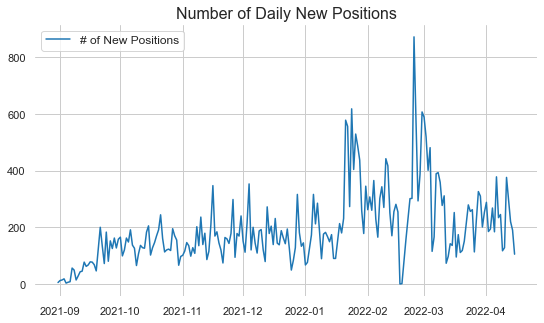

In [11]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.despine(left=True, bottom=True)
sns.lineplot(data=daily_opened_trades, ax=ax)
ax.set_title('Number of Daily New Positions', fontsize=16)
ax.legend(['# of New Positions'], fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig('./graphs/new_daily_positions.png', format='png')
plt.show()

## Highlight Arbiscan timestamp issues
Arbiscan does not provide completely accurate timestamps, so we must allow for some uncertainty in our analysis

In [12]:
ARBISCAN_API_KEY = os.getenv('ARBISCAN_API_KEY')

In [13]:
trade_id, timestamp = positions.loc[0, ['id', 'timestamp']].values

In [14]:
for buffer in [-60, -40, -20, 0, 20, 40, 60]:
    t = str(int(timestamp + buffer))
    r = requests.get('https://api.arbiscan.io/api?module=block&action=getblocknobytime&timestamp=' + t + '&closest=before&apikey=' + ARBISCAN_API_KEY)
    print('timestamp + ' + str(buffer) + 's --> block: ' + str(r.json()['result']))
    sleep(.22)

timestamp + -60s --> block: 227175
timestamp + -40s --> block: 227175
timestamp + -20s --> block: 227175
timestamp + 0s --> block: 227178
timestamp + 20s --> block: 227178
timestamp + 40s --> block: 227178
timestamp + 60s --> block: 227180


In [15]:
# what was the actual block? look up tx hash  -- > 227178
trade_id.split(':')[1]

'0xb45c0cd26357bf450b8c4bc8980fcf1f1c49575300685449d4144e7709c82cca'

## Import Binance Data

In [16]:
from binance_utils import import_binance_data
from data_cleaning_utils import merge_eth_trade_data_with_binance

In [17]:
binance_df = import_binance_data()

In [18]:
trade_data = positions  # positions includes all trades, not only opening trades

In [19]:
eth_trade_data = merge_eth_trade_data_with_binance(trade_data, binance_df)

## Arbitrage Analysis

In [20]:
GMX_SPREAD = 0.1

In [21]:
eth_trade_data = eth_trade_data.loc[eth_trade_data['sizeDelta'] != 0].reset_index(drop=True)  # exclude liquidity adds

In [22]:
eth_trade_data['realTradeSize'] = eth_trade_data['fee'] * 1000  # more accurate than sizeDelta
eth_trade_data['trade_arb_pnl'] = (eth_trade_data['price_edge'] - GMX_SPREAD) / 100 * eth_trade_data['realTradeSize']

In [23]:
account_to_n_trades = dict(eth_trade_data.groupby('account').count()['time'])
account_to_volume = dict(eth_trade_data.groupby('account')['realTradeSize'].sum())
account_to_arb_pnl = dict(eth_trade_data.groupby('account')['trade_arb_pnl'].sum())
account_to_avg_edge = dict(eth_trade_data.groupby('account').apply(lambda x: np.sum(x['price_edge'] * x['realTradeSize']) / x['realTradeSize'].sum()))
account_to_median_price_edge_by_type = dict(eth_trade_data.groupby(['account', 'position_type'])['price_edge'].median())

In [24]:
edge_df = pd.DataFrame(data={'account': account_to_avg_edge.keys(), 'avg_edge': account_to_avg_edge.values()})

In [25]:
edge_df['n_trades'] = edge_df['account'].apply(lambda x: account_to_n_trades[x])
edge_df['volume'] = edge_df['account'].apply(lambda x: int(account_to_volume[x]))
edge_df['percent_of_total_volume'] = edge_df['volume'] / edge_df['volume'].sum() * 100
edge_df['profit_extracted'] =  edge_df['account'].apply(lambda x: account_to_arb_pnl[x])


In [26]:
def try_decrease_price_edge(x):
    try:  # not all accounts have closed a trade
        return account_to_median_price_edge_by_type[(x, 'DecreasePosition')]
    except:
        return pd.NA

In [27]:
edge_df['med_increase_price_edge'] =  edge_df['account'].apply(lambda x: account_to_median_price_edge_by_type[(x, 'IncreasePosition')])
edge_df['med_decrease_price_edge'] = edge_df['account'].apply(try_decrease_price_edge)

## Method 1 for Detecting Arb: Outsized Arb Profits

If the account consistently trades in size at times when the oracle price is better than random, it must be aware of the oracle price difference

In [28]:
P_VALUE_TRESH = 1 - (1-0.05)**(1/3)  # three individual tests --> 0.05 signifinace
P_VALUE_TRESH

0.016952427508441503

In [29]:
# we select the merged decrease avg price edges by account as the null distribution of no arb
merged_decreases = eth_trade_data.loc[eth_trade_data['position_type'] == 'DecreasePosition'].reset_index(drop=True)

In [30]:
# sample from the null distribution (by account) a sufficient number of times
# sampling by account corrects for the sampling bias introduced by arb accounts having more txs
price_edges = []
for i in range(20):
    price_edges += merged_decreases.groupby('account')['price_edge'].apply(lambda x: x.sample(1)).reset_index()['price_edge'].to_list()

In [31]:
len(price_edges)

53440

In [32]:
def sample_random_pnl(account, n_samples = 5000):
    """ samples PnLs from the null distribution of no price systemic price edge 
        note that the sample uses the accounts actual bet sizes to reproduce appropriate variance """
    sizes = eth_trade_data.loc[eth_trade_data['account'] == account, 'realTradeSize'].to_numpy()
    pnls = np.zeros(n_samples)
    for i in range(n_samples):
        random_edges = np.array(random.sample(price_edges, len(sizes))) - GMX_SPREAD
        pnls[i] = np.sum(sizes * random_edges) / 100
    return pnls

In [33]:
def get_pnl_p_value(x):
    """ returns p value for whether the actual returns are within null distribution """
    random_pnls = x['random_pnls']
    return np.sum(random_pnls > x['profit_extracted']) / random_pnls.shape[0]

In [34]:
top100 = edge_df.sort_values(by='percent_of_total_volume', ascending=False).reset_index(drop=True)[:100]

In [35]:
top100['random_pnls'] = top100['account'].apply(lambda x: sample_random_pnl(x))  # random sample

In [36]:
top100['return_p_value'] = top100.apply(get_pnl_p_value, axis=1)

In [37]:
top100

,account,avg_edge,n_trades,volume,percent_of_total_volume,profit_extracted,med_increase_price_edge,med_decrease_price_edge,random_pnls,return_p_value
0,0xff33f5653e547a0b54b86b35a45e8b1c9abd1c46,0.183732,429,2238383275,14.027760,1.874249e+06,0.156755,0.112921,"[2059046.6655292255, 964979.8810084161, 166335...",0.1204
1,0xa7e38489a00e6dd16ff479638b5265cb505a9052,0.158641,166,1288432138,8.074496,7.555530e+05,0.130647,0.135711,"[1423432.7484204813, 421911.45647606574, 84476...",0.5234
2,0x3f60c551cb21361475273601bdffb9e41b9f5934,0.172896,36,482459057,3.023530,3.516925e+05,0.147908,0.097549,"[222136.50038232797, 404417.1039926747, -11015...",0.3592
3,0x56676fddae187f765cf20f6ec659b3736f444484,0.140286,55,428549077,2.685681,1.726440e+05,0.083392,0.114272,"[288959.85005018744, 142868.52121591705, 11887...",0.6626
4,0x5b16557f1b63f981d1b4cfad18e7a4d5283fefc6,0.217826,97,428373781,2.684582,5.047337e+05,0.089384,0.201362,"[354285.57856078475, 348572.0194535705, 378453...",0.1024
...,...,...,...,...,...,...,...,...,...,...
95,0xba1247e8f8f1e592a45925b7c1447d19cc7628b5,-0.085986,8,25369321,0.158987,-4.718329e+04,0.115599,0.068416,"[22812.672308146764, -4972.992808254301, 2154....",0.9992
96,0xdce64a75c5a15826d059fc3d0812dbd3baef5893,0.141383,108,25089458,0.157234,1.038280e+04,0.148176,0.093354,"[22981.038172586726, 16039.853080188816, 16117...",0.8242
97,0x0468222405c1f78f80035c7a87254df9bb2a9381,0.066915,12,24014998,0.150500,-7.945468e+03,0.069577,0.065048,"[22247.290636665868, 17224.572529260757, -2540...",0.8910
98,0x20eadfcaf91bd98674ff8fc341d148e1731576a4,0.217992,21,24001423,0.150415,2.831965e+04,0.092738,0.311029,"[2593.380849267154, 20243.74800620616, 26417.8...",0.1778


In [38]:
top100.loc[top100['return_p_value'] < P_VALUE_TRESH, 'percent_of_total_volume'].count()  # number of arb bots out of top 100 by volume

26

In [39]:
top_arb = top100.loc[top100['return_p_value'] < P_VALUE_TRESH].reset_index(drop=True)

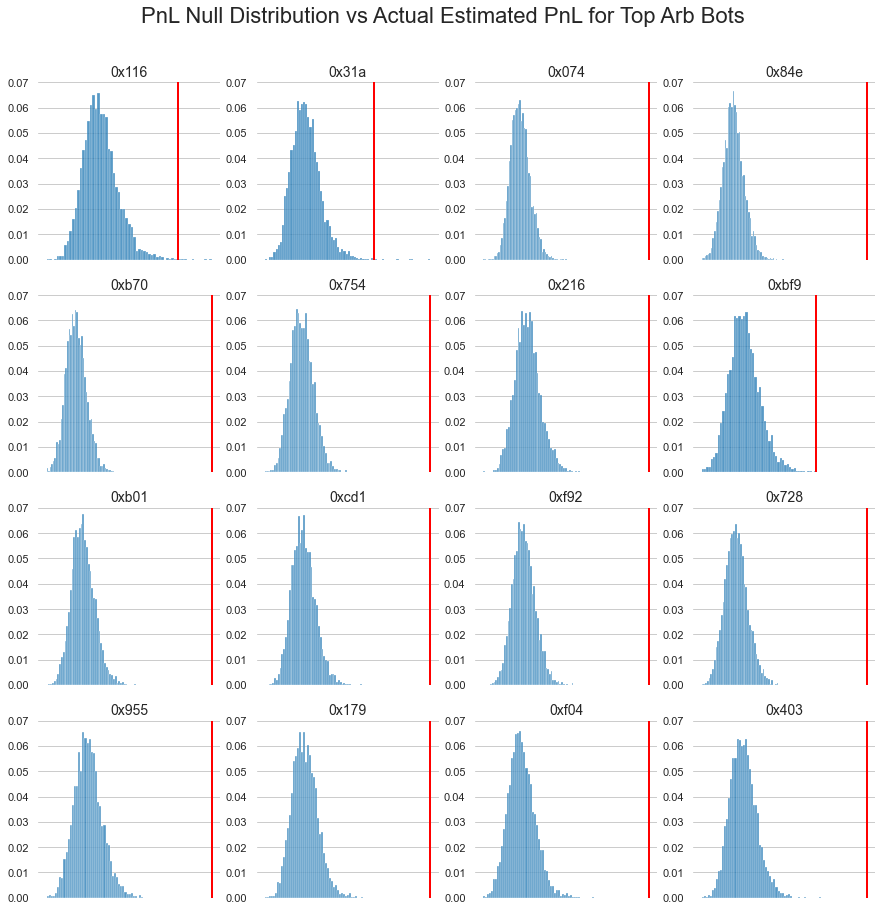

In [40]:
fig, axs = plt.subplots(4,4,figsize=(15,15))
sns.despine(left=True, bottom=True)
for i, ax in enumerate(axs.flat):
    sns.histplot(top_arb.loc[i, 'random_pnls'], ax=ax, stat='probability')
    ax.vlines([top_arb.loc[i, 'profit_extracted']], ymin=0, ymax=0.07, color='red', linewidth=2)
    ax.set_title(top_arb.loc[i, 'account'][:5], fontsize=14)
    ax.set_xticks([])
    ax.set_ylabel('')
    ax.set_ylim([0,0.07])

fig.suptitle('PnL Null Distribution vs Actual Estimated PnL for Top Arb Bots', fontsize=22, y=.95)
plt.savefig('./graphs/test1_arb.png', format='png')
plt.show()

In [41]:
top_traders = top100.loc[top100['return_p_value'] > P_VALUE_TRESH].reset_index(drop=True)

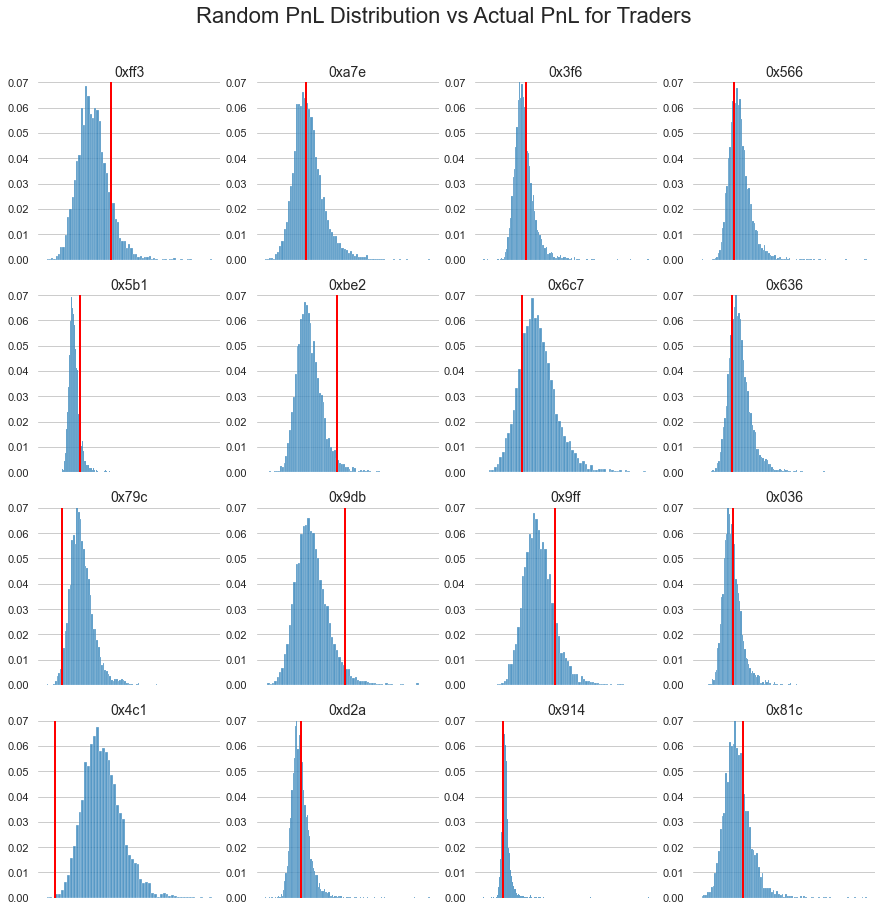

In [42]:
fig, axs = plt.subplots(4,4,figsize=(15,15))
sns.despine(left=True, bottom=True)
for i, ax in enumerate(axs.flat):
    sns.histplot(top_traders.loc[i, 'random_pnls'], ax=ax, stat='probability')
    ax.vlines([top_traders.loc[i, 'profit_extracted']], ymin=0, ymax=0.07, color='red', linewidth=2)
    ax.set_title(top_traders.loc[i, 'account'][:5], fontsize=14)
    ax.set_xticks([])
    ax.set_ylabel('')
    ax.set_ylim([0,0.07])

fig.suptitle('Random PnL Distribution vs Actual PnL for Traders', fontsize=22, y=.95)
plt.savefig('./graphs/test1_traders.png', format='png')
plt.show()

### Method 2 for Detecting Arb: Differences Between Entering and Exiting Positions
In the null hypothesis of no arb, there is no difference between the increasing and decreasing price edges.
Users that have an outsized difference between the price edge of their increasing and decreasing orders are likely bots.

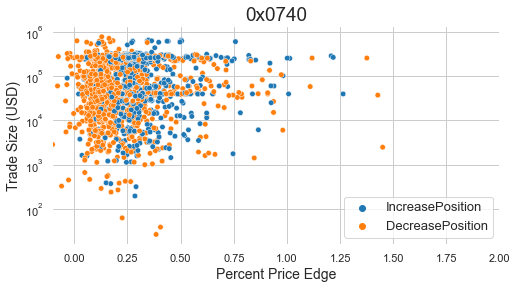

In [43]:
# show percent price edge
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.despine(left=True, bottom=True)
subset = eth_trade_data.loc[eth_trade_data['account'] == '0x0740902dbe5d30259b387404248a207ab581dd8c'].reset_index(drop=True)
# subset['named_position_type'] = subset['position_type']
# subset.loc[subset['named_position_type'] == 'IncreasePosition'] = 'Increasing Position'
# subset.loc[subset['named_position_type'] == 'DecreasePosition'] = 'Decreasing Position'
sns.scatterplot(x='price_edge', y='realTradeSize', hue='position_type',data=subset, ax=ax, s=30)
# ax.vlines([subset.loc[subset['position_type'] == 'IncreasePosition']
# ax.legend(['Increasing Position', 'Decreasing Position'], fontsize=16)
ax.set_yscale('log')
ax.set_title(subset.loc[0, 'account'][:6], fontsize=19)
ax.set_xlabel('Percent Price Edge', fontsize=14)
ax.set_ylabel('Trade Size (USD)', fontsize=14)
ax.set_xlim([-0.1,2])
ax.legend(fontsize=13)
plt.show()

6


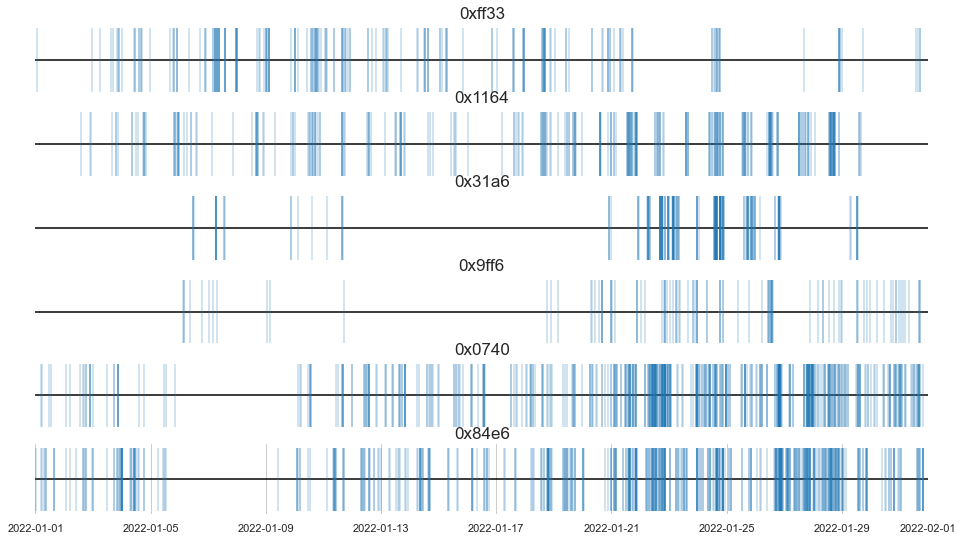

In [44]:
# show percent price edge
addresses = ['0xff33f5653e547a0b54b86b35a45e8b1c9abd1c46', '0x1164fa17505e7196889d698b0c348c50dfc3eccd', '0x31a61f289e0c340913c2ab79efa299947af9daf6', '0x9ff63a840d278eb455da769684dd509661cd9d46', 
             '0x0740902dbe5d30259b387404248a207ab581dd8c', '0x84e6bcf13f67730b58bf2d03d44fce2574f9ecfe']
fig, axs = plt.subplots(len(addresses),1,figsize=(16,9))
sns.despine(left=True, bottom=True)

min_time = pd.to_datetime('01-01-2022')
max_time = pd.to_datetime('02-01-2022')
print(len(addresses))
for i, ax in enumerate(axs.flat):
    subset = eth_trade_data.loc[eth_trade_data['account'] == addresses[i]].reset_index(drop=True)
    ax.hlines(.5, xmin=min_time, xmax=max_time, color='black')
    ax.vlines(subset['time'], ymin=0, ymax=1, linewidth=0.4)
    ax.set_xlim([min_time, max_time])
    ax.set_yticks([])
    ax.set_title(subset.loc[0, 'account'][:6], fontsize=17)
    if i < len(addresses) - 1:
        ax.set_xticks([])

plt.savefig('./graphs/top_arb_timings.png', format='png')
plt.show()

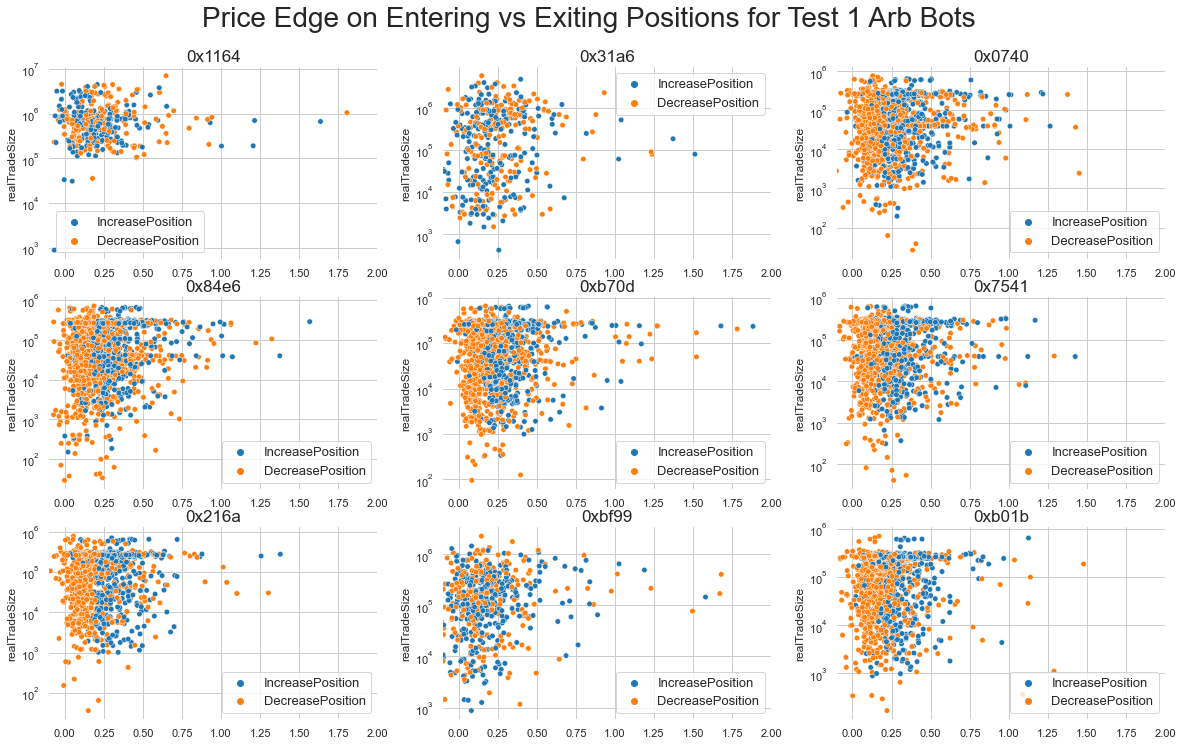

In [45]:
fig, axs = plt.subplots(3,3,figsize=(20, 12))
sns.despine(left=True, bottom=True)
for i, ax in enumerate(axs.flat):
    subset = eth_trade_data.loc[eth_trade_data['account'] == top_arb.loc[i, 'account']].reset_index(drop=True)
    sns.scatterplot(x='price_edge', y='realTradeSize', hue='position_type',data=subset, ax=ax, s=30)
    # ax.vlines([subset.loc[subset['position_type'] == 'IncreasePosition']
    ax.set_yscale('log')
    ax.set_title(subset.loc[0, 'account'][:6], fontsize=17)
    ax.set_xlim([-0.1,2])
    ax.set_xlabel('')
    ax.legend(fontsize=13)
fig.suptitle('Price Edge on Entering vs Exiting Positions for Test 1 Arb Bots', fontsize=28, y=.95)
plt.savefig('./graphs/test2_arb.png', format='png')
plt.show()

In [46]:
def sample_random_medians(subset, n_samples=5000):
    n_decreases, _ = subset.groupby('position_type')['price_edge'].count().values  # make groups the right size
    sampled_decreases = []  # no need to sample increases as doing so is redundant, adds no information
    for i in range(n_samples):
        sampled_decreases.append(subset['price_edge'].sample(n_decreases).median())
    
    return sampled_decreases

In [47]:
# for an account, get true medians and samples
def get_true_and_sampled_medians(account):
    subset = eth_trade_data.loc[eth_trade_data['account'] == account].reset_index(drop=True)
    true_decrease_median, true_increase_median = subset.groupby('position_type')['price_edge'].median().values
    sampled_decreases = sample_random_medians(subset)
    return true_decrease_median, true_increase_median, sampled_decreases

In [48]:
top100['median_info'] = top100['account'].apply(get_true_and_sampled_medians)  # run stats for all top 100 accounts

In [49]:
top100['median_p_value'] = top100['median_info'].apply(lambda x: np.sum(x[2] < x[0]) / len(x[2]))

In [50]:
top_arb = top100.loc[top100['median_p_value'] < P_VALUE_TRESH].reset_index(drop=True)

In [51]:
top_arb.loc[top_arb['return_p_value'] > P_VALUE_TRESH].shape[0]

6

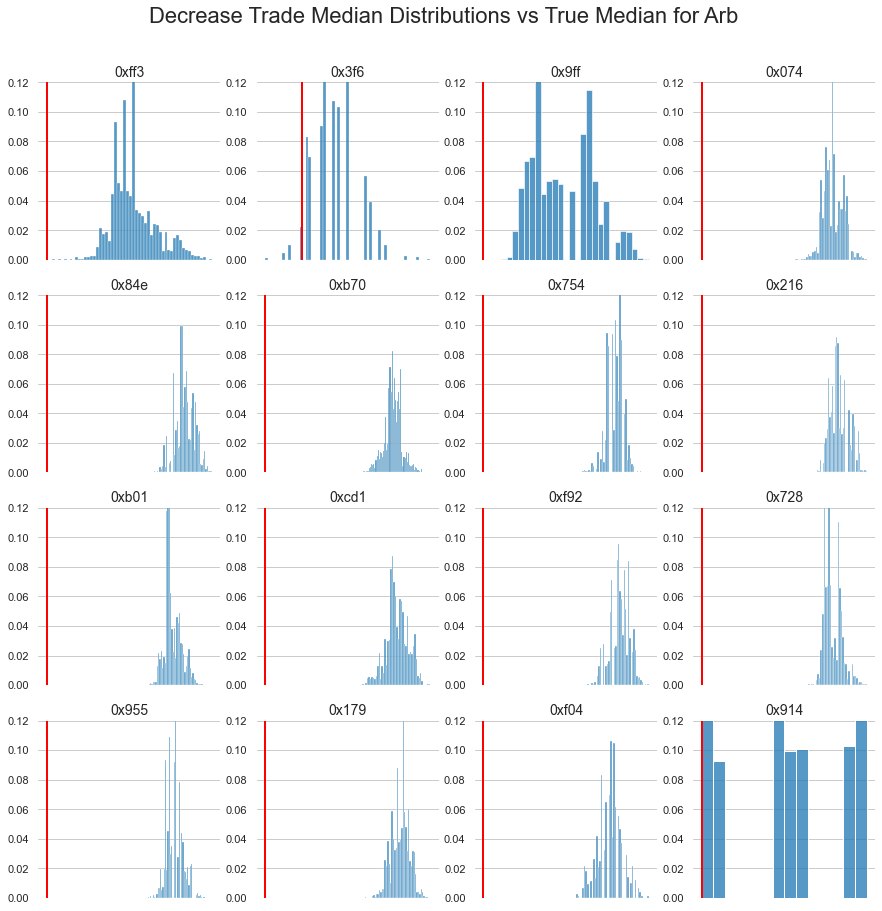

In [52]:
# for a whole group
fig, axs = plt.subplots(4,4,figsize=(15,15))
sns.despine(left=True, bottom=True)
for i, ax in enumerate(axs.flat):
    actual_decrease_median, actual_increase_median, sampled_decreases = top_arb.loc[i, 'median_info']
    sns.histplot(sampled_decreases, ax=ax, stat='probability')
    ax.vlines([actual_decrease_median], ymin=0, ymax=0.12, color='red', linewidth=2)
    ax.set_title(top_arb.loc[i, 'account'][:5], fontsize=14)
    ax.set_xticks([])
    ax.set_ylabel('')
    ax.set_ylim([0,0.12])

fig.suptitle('Decrease Trade Median Distributions vs True Median for Arb', fontsize=22, y=.95)
plt.savefig('./graphs/decrease_median_distributions_arb.png', format='png')
plt.show()

In [53]:
top_traders = top100.loc[(top100['median_p_value'] > P_VALUE_TRESH) & 
                         (top100['return_p_value'] > P_VALUE_TRESH)].reset_index(drop=True)

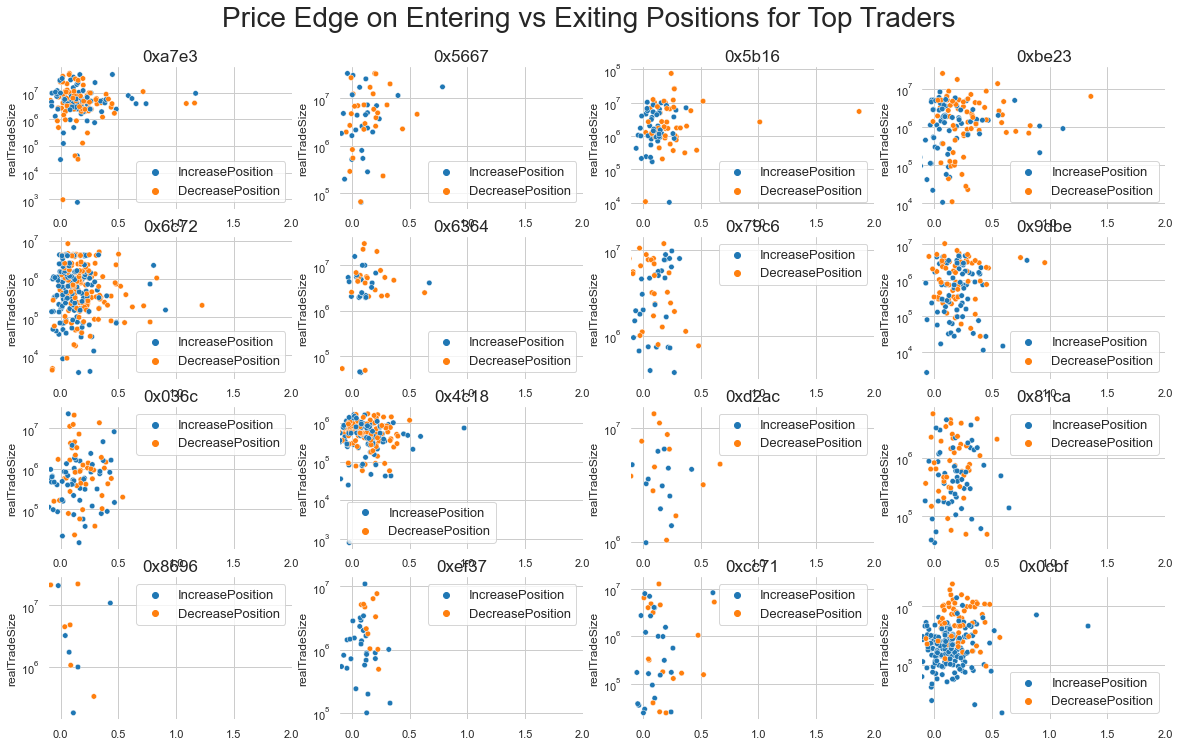

In [54]:
fig, axs = plt.subplots(4,4,figsize=(20, 12))
sns.despine(left=True, bottom=True)
for i, ax in enumerate(axs.flat):
    subset = eth_trade_data.loc[eth_trade_data['account'] == top_traders.loc[i, 'account']].reset_index(drop=True)
    sns.scatterplot(x='price_edge', y='realTradeSize', hue='position_type',data=subset, ax=ax, s=30)
    # ax.vlines([subset.loc[subset['position_type'] == 'IncreasePosition']
    ax.set_yscale('log')
    ax.set_title(subset.loc[0, 'account'][:6], fontsize=17)
    ax.set_xlim([-0.1,2])
    ax.set_xlabel('')
    ax.legend(fontsize=13)
fig.suptitle('Price Edge on Entering vs Exiting Positions for Top Traders', fontsize=28, y=.95)
plt.savefig('./graphs/price_edge_traders.png', format='png')
plt.show()

## Method 3: Timing

If an account disproportionately trades at the same timestamps as established arb bots, 
they must be trading using the same signal

In [55]:
account_to_timings = dict(eth_trade_data.groupby(['account']).apply(lambda x: x['time'].to_list()))

In [56]:
top100['timing_vec'] = top100['account'].apply(lambda x: account_to_timings[x])

In [57]:
top_arb = top100.loc[(top100['return_p_value'] < P_VALUE_TRESH) | (top100['median_p_value'] < P_VALUE_TRESH)].reset_index(drop=True)
top_arb_accounts = top_arb['account'].to_list()

In [58]:
all_arb_times = set(eth_trade_data.loc[eth_trade_data['account'].isin(top_arb_accounts), 'time'])
all_non_arb_times = eth_trade_data.loc[~eth_trade_data['account'].isin(top_arb_accounts), 'time']

In [59]:
# percent chance that a single non arb timestamp is randomly arb
np.sum(list(map(lambda x: x in all_arb_times, all_non_arb_times))) / len(all_non_arb_times) * 100

12.528102953717344

In [60]:
def get_percent_arb_timings(account):
    account_timings_vec = account_to_timings[account]
    return np.sum(list(map(lambda x: x in all_arb_times, account_timings_vec))) / len(account_timings_vec) * 100

In [61]:
def sample_random_times(n):  # samples from the null distribution of no arb timings
    return all_non_arb_times.sample(n)

In [62]:
def get_random_arb_timing_percentages(account, n_samples=1000):
    n_times = eth_trade_data.loc[eth_trade_data['account'] == account].shape[0]
    random_percentages = []
    for i in range(n_samples):
        random_times = sample_random_times(n_times)
        random_percentages.append(np.sum(list(map(lambda x: x in all_arb_times, random_times))) / len(random_times) * 100)
    return random_percentages

In [63]:
top100['percent_arb_timings'] = top100['account'].apply(get_percent_arb_timings)

In [64]:
top100['random_time_percentages'] = top100['account'].apply(get_random_arb_timing_percentages)

In [65]:
top100['timing_p_value'] = top100.apply(lambda x: np.sum(np.array(x['random_time_percentages']) > x['percent_arb_timings']) / len(x['random_time_percentages']), axis=1)

In [66]:
top100.loc[(top100['return_p_value'] > P_VALUE_TRESH) & (top100['median_p_value'] > P_VALUE_TRESH) &
           (top100['timing_p_value'] < P_VALUE_TRESH)].shape[0]

16

## Graphing Arbitrage Volume

In [67]:
top100['account_type'] = "Likely Retail"
top100.loc[(top100['return_p_value'] < P_VALUE_TRESH) | (top100['median_p_value'] < P_VALUE_TRESH) |
           (top100['timing_p_value'] < P_VALUE_TRESH), 'account_type'] = "Confirmed Arb Bot"  # expected false positive rate of ~5%, sufficiently low

In [68]:
top100['percent_of_total_volume'].sum()

82.80506858057872

In [69]:
top100['account_type'].value_counts().reset_index()

,index,account_type
0,Likely Retail,52
1,Confirmed Arb Bot,48


In [70]:
top_vol_accounts = top100[:40]

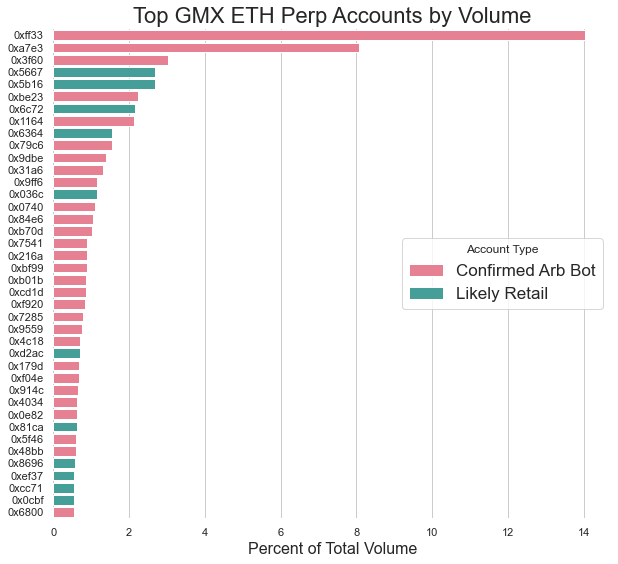

In [71]:
fig, ax = plt.subplots(1,1,figsize=(10,9))
sns.despine(left=True, bottom=True)
sns.barplot(x='percent_of_total_volume', y='account', hue='account_type', data=top_vol_accounts, ax=ax, dodge=False, palette="husl")
accounts = [str(x)[:6] for x in top_vol_accounts['account'].to_list()]
ax.set_yticks(ticks=top_vol_accounts.index, labels=accounts)
ax.legend(title='Account Type', fontsize=17)
ax.set_ylabel('')
# ax.set_xscale('log')
ax.set_xlabel('Percent of Total Volume', fontsize=16)
ax.set_title('Top GMX ETH Perp Accounts by Volume', fontsize=22)
plt.savefig('./graphs/top_accounts_volume.png', format='png')
plt.show()

In [72]:
top_vol_accounts['account_type'].value_counts()

Confirmed Arb Bot    29
Likely Retail        11
Name: account_type, dtype: int64

In [73]:
top_vol_accounts.groupby('account_type')['n_trades'].mean()

account_type
Confirmed Arb Bot    677.0
Likely Retail         94.0
Name: n_trades, dtype: float64

In [74]:
top_vol_accounts.groupby('account_type')['n_trades'].median()

account_type
Confirmed Arb Bot    702.0
Likely Retail         55.0
Name: n_trades, dtype: float64

In [75]:
top_vol_accounts = top100

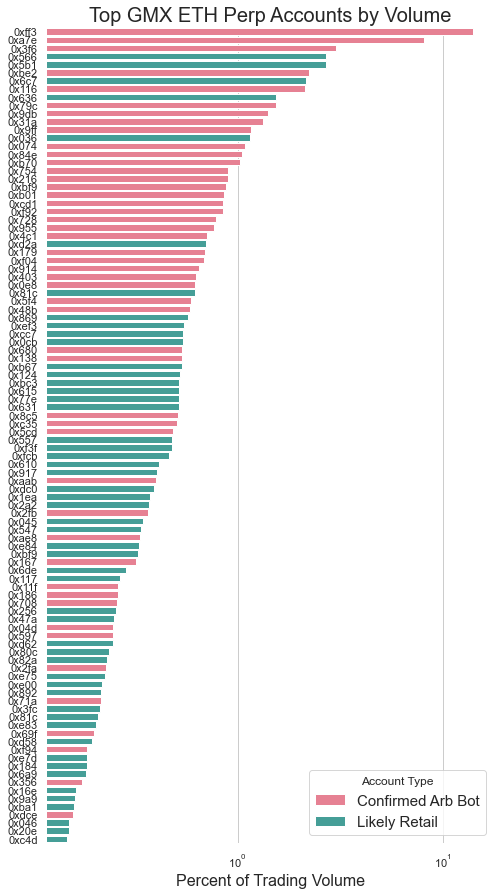

In [76]:
# top 20 volume accounts arb PnL
fig, ax = plt.subplots(1,1,figsize=(8,15))
sns.despine(left=True, bottom=True)
sns.barplot(x='percent_of_total_volume', y='account', hue='account_type', data=top_vol_accounts, ax=ax, dodge=False, palette="husl")
accounts = [str(x)[:5] for x in top_vol_accounts['account'].to_list()]
ax.set_yticks(ticks=top_vol_accounts.index, labels=accounts)
ax.legend(title='Account Type', fontsize=15)
ax.set_xscale('log')
ax.set_xlabel('Percent of Trading Volume', fontsize=16)
ax.set_ylabel('')
ax.set_title('Top GMX ETH Perp Accounts by Volume', fontsize=20)
plt.savefig('./graphs/top_100_volume.png', format='png')
plt.show()

In [77]:
likely_retail_volume = top100.loc[top100['account_type'] == "Likely Retail", 'volume'].sum()
confirmed_arb_volume = top100.loc[top100['account_type'] == "Confirmed Arb Bot", 'volume'].sum()
total_volume = likely_retail_volume + confirmed_arb_volume

In [78]:
likely_retail_volume = likely_retail_volume / total_volume * 100
confirmed_arb_volume = confirmed_arb_volume / total_volume * 100

In [79]:
colors = sns.color_palette('deep')

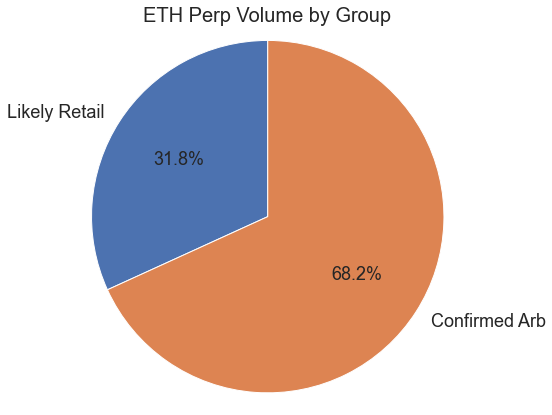

In [80]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
vols = [likely_retail_volume, confirmed_arb_volume]
labels = ['Likely Retail', 'Confirmed Arb']
ax.pie(vols, labels=labels, autopct='%1.1f%%', startangle=90, colors=[c for c in colors[:3]], textprops={'fontsize': 18})
ax.axis('equal')
ax.set_title('ETH Perp Volume by Group', fontsize=20)
plt.savefig('./graphs/volume_pie_chart.png', format='png')
plt.show()

In [81]:
total_fees_collected = int(trade_data.loc[trade_data['indexToken'] == 'WETH', 'fee'].sum())

In [82]:
confirmed_arb_pnl = top100.loc[top100['account_type'] == "Confirmed Arb Bot", 'profit_extracted'].sum()

In [83]:
confirmed_arb_addresses = top100.loc[top100['account_type'] == "Confirmed Arb Bot", 'account'].to_list()
likely_retail_addresses = top100.loc[top100['account_type'] == "Likely Retail", 'account'].to_list()

In [84]:
confirmed_arb_fees_paid = eth_trade_data.loc[eth_trade_data['account'].isin(confirmed_arb_addresses), 'fee'].sum()

In [85]:
barplot_df = pd.DataFrame(data = {'Group': ['Total Fees Collected', 'Arb Profits', 'Arb Fees Collected'], #, 'Highly Likely Arb Profits'], 
                                  'Fees': [total_fees_collected, confirmed_arb_pnl, confirmed_arb_fees_paid]})

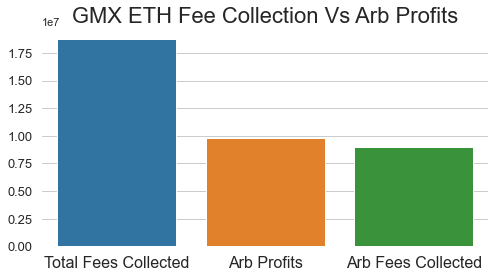

In [86]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.despine(left=True, bottom=True)
sns.barplot(x='Group', y='Fees', data=barplot_df, ax=ax, dodge=False)
ax.set_xlabel('')
ax.set_ylabel('', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=13)
ax.set_title('GMX ETH Fee Collection Vs Arb Profits', fontsize=22)
plt.savefig('./graphs/fees_collected.png', format='png')
plt.show()

In [87]:
arb_subset = eth_trade_data.loc[eth_trade_data['account'].isin(confirmed_arb_addresses)].sort_values(
    by='time').reset_index(drop=True)
retail_subset = eth_trade_data.loc[eth_trade_data['account'].isin(likely_retail_addresses)].sort_values(
    by='time').reset_index(drop=True)

In [88]:
arb_subset['total_volume'] = arb_subset['realTradeSize'].cumsum()
arb_subset['Order Flow'] = 'Arbitrage Volume'
retail_subset['total_volume'] = retail_subset['realTradeSize'].cumsum()
retail_subset['Order Flow'] = 'Retail Volume'

In [89]:
# daily arb volume vs daily retail volume from Jan 1
arb_vol = arb_subset.loc[arb_subset['time'] > '01-01-2022'].groupby(pd.Grouper(key='time', freq='1W'))[
    'realTradeSize'].sum().reset_index().rename(columns={'realTradeSize': 'Daily Arb Volume'})

In [90]:
retail_vol = retail_subset.loc[retail_subset['time'] > '01-01-2022'].groupby(pd.Grouper(key='time', freq='1W'))[
    'realTradeSize'].sum().reset_index().rename(columns={'realTradeSize': 'Daily Retail Volume'})

In [91]:
daily_vol = retail_vol.merge(arb_vol, on ='time')

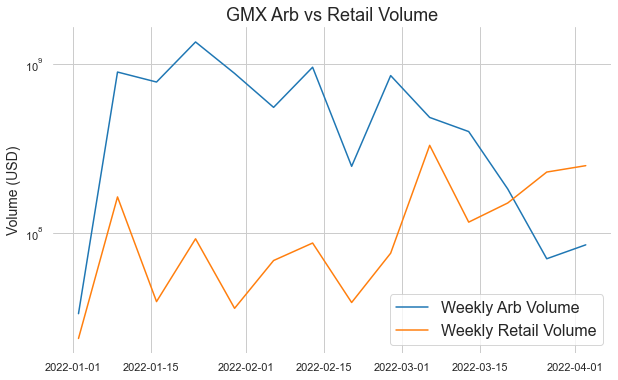

In [92]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.despine(left=True, bottom=True)
sns.lineplot(x='time', y='Daily Arb Volume', data=daily_vol, ax=ax)
sns.lineplot(x='time', y='Daily Retail Volume', data=daily_vol, ax=ax)
ax.legend(['Weekly Arb Volume', 'Weekly Retail Volume'], fontsize=16)
ax.set_title('GMX Arb vs Retail Volume', fontsize=18)
ax.set_yscale('log')
ax.set_xlabel('')
ax.set_ylabel('Volume (USD)', fontsize=14)
plt.savefig('./graphs/arb_vs_retail_volume.png', format='png')
plt.show()

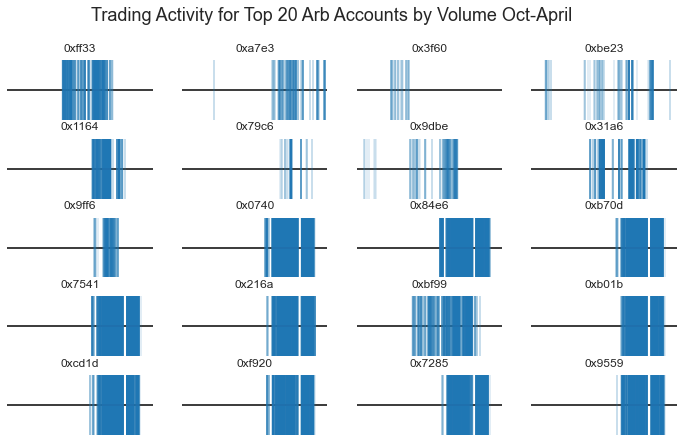

In [93]:
# when were the top 20 arb accounts active on ETH
fig, axs = plt.subplots(5,4,figsize=(12,7))
sns.despine(left=True, bottom=True)
min_time = eth_trade_data['time'].min()
max_time = eth_trade_data['time'].max()

for i, ax in enumerate(axs.flat):
    subset = eth_trade_data.loc[eth_trade_data['account'] == confirmed_arb_addresses[i]].reset_index(drop=True)
    ax.hlines(.5, xmin=min_time, xmax=max_time, color='black')
    ax.vlines(subset['time'], ymin=0, ymax=1, linewidth=0.25)
    ax.set_xlim([min_time, max_time])
    ax.set_title(str(confirmed_arb_addresses[i])[:6], fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle('Trading Activity for Top 20 Arb Accounts by Volume Oct-April', fontsize=18)
plt.savefig('./graphs/top_20_arb_timings.png', format='png')
plt.show()  # looks like the same person operating....

In [94]:
# leaderboard
leaderboard = pd.read_csv('all_time_leaderboard.csv')

In [95]:
leaderboard = leaderboard[['account', 'realisedPnl']]

In [96]:
leaderboard['realisedPnl'] = leaderboard['realisedPnl'].astype(float) / 10**30

In [97]:
account_to_pnl = dict(zip(leaderboard['account'].values, leaderboard['realisedPnl']))

In [98]:
top100['realized_pnl'] = top100['account'].apply(lambda x: account_to_pnl[x])

In [99]:
top_vol_accounts = top100[:40]

In [100]:
pd.DataFrame(top100.groupby('account_type').apply(lambda x: x['realized_pnl'].sum() / x['percent_of_total_volume'].sum())).rename(columns = {0: 'PnL/Volume'}).astype(int)

,PnL/Volume
account_type,
Confirmed Arb Bot,-73278
Likely Retail,-520662


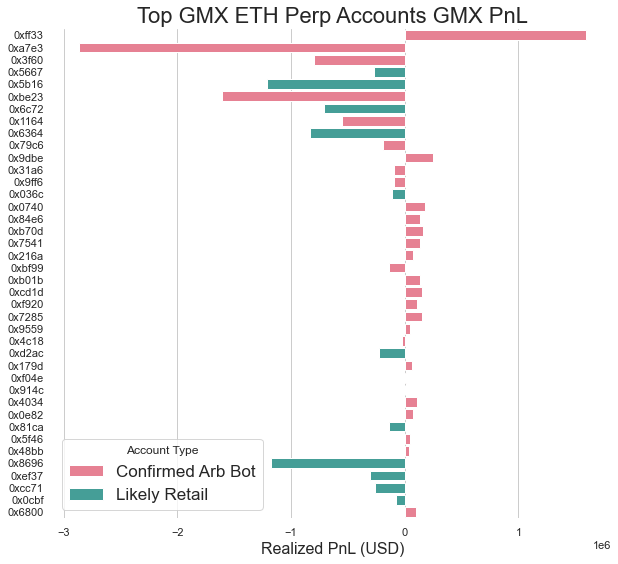

In [101]:
fig, ax = plt.subplots(1,1,figsize=(10,9))
sns.despine(left=True, bottom=True)
sns.barplot(x='realized_pnl', y='account', hue='account_type', data=top_vol_accounts, ax=ax, dodge=False, palette="husl")
accounts = [str(x)[:6] for x in top_vol_accounts['account'].to_list()]
ax.set_yticks(ticks=top_vol_accounts.index, labels=accounts)
ax.legend(title='Account Type', fontsize=17)
ax.set_ylabel('')
# ax.set_xscale('log')
ax.set_xlabel('Realized PnL (USD)', fontsize=16)
ax.set_title('Top GMX ETH Perp Accounts GMX PnL', fontsize=22)
plt.savefig('./graphs/top_accounts_pnl.png', format='png')
plt.show()